# ДЗ 6 VK API

|Балл|Сделано|Критерий|
|--|--|--|
|1|да|Программа запускается и оформлена по PEP8. Соответствие PEP8 можно проверить с помощью команды `pycodestyle my_script_name.py` в командной строке.|
|2|да|Программа умеет выкачивать посты и комментариии (больше 100 постов и больше 100 комментариев к посту).|
|1|да|Посчитана средняя длина поста и комментария в словах и построены соответствующие графики.|
|1|да|Программа умеет доставать из профиля пользователя параметры №1 и №2 для графиков про среднюю длину **поста** (например, город с названием и возраст). В случае пабликов можно брать параметры не из профиля автора (например, год и день недели публикации поста).|
|1|3/2|Построены графики зависимости средней длины поста от этих двух параметров, оформленные согласно требованиям. Графики со стандартными настройками без подписей — 0.5 балла.|
|1|да|Программа умеет доставать из профиля пользователя параметры №3 и №4 для графиков про среднюю длину **комментария**.|
|1|2/2|Построены графики зависимости средней длины комментария от этих двух параметров, оформленные согласно требованиям. Графики со стандартными настройками без подписей — 0.5 балла.|
|1|нет|Построен график частотности для топ 20-30 слов по нелемматизированным текстам. График со стандартными настройками без подписей — 0.5 балла.|
|1|да|Построен график частотности для топ 20-30 слов по лемматизированным текстам. График со стандартными настройками без подписей — 0.5 балла.|
|1|нет|**Бонусный балл.** Построено облако слов для топ 20-30 слов по лемматизированным текстам.|
|4|нет|**Бонусный балл.** Более сложная структура корпуса: сохранены не только тексты, но информация о пользователях, написавших тот или иной пост (id, город, возраст, пол,  имя и далее по желанию), id поста/комментария и связь комментариев с постами. Можно сделать это в виде базы данных, можно просто в csv-таблице. В случае с БД за это задание дается 4 балла, в случае с таблицей — 3 балла.|
|**9**|**ВСЕГО БАЛЛОВ**||

In [132]:
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


Сообщество: скам испания и две chicas, https://vk.com/espanachicas

Достать посты - через **wall.get**, передав *domain, цикл с оффсетом* , получив *id, owner_id, from_id, text*

Для каждого поста достать комменты - через **wall.getComments**, передав *owner_id, post_id=id*, получив *id, text, from_id*

Для каждого коммента достать инфу про автора - через **users.get**, передав *user_ids=from_id*, получив *bdate, city-title, education, has_photo, occupation-type, relation, sex*

Сложить все это в json со структурой:

        {
            "post": {
                "source": -169710947,
                "author": -169710947,
                "id": 3568,
                "date": {
                    "year": "2019",
                    "month": "04",
                    "day": "22",
                    "hours": "12",
                    "minutes": "29"
                },
                "text": "Помимо смешных постов в ленту, наша команда занимается разработкой современного вирусного контента, за который не будет стыдно. \n \nЕсли вы представитель заинтересованного бренда, который хочет себе действительно качественный контент или нативное размещение — напишите нам в личные сообщения паблику или на почту 2damongus@gmail.com для подробной информации.",
                "comments": [
                    {
                        "id": 3576,
                        "text": "Кривовато",
                        "date": {
                            "year": "2019",
                            "month": "04",
                            "day": "22",
                            "hours": "20",
                            "minutes": "40"
                        },
                        "author": {
                            "type": "user",
                            "id": 462306852,
                            "bdate": [
                                "5",
                                "11",
                                "1999"
                            ],
                            "age": 19,
                            "city": "none",
                            "education": "none",
                            "has_photo": 1,
                            "occupation": "work",
                            "relation": "none",
                            "sex": 2
                        }
                    }]
            }}

In [2]:
import json

import urllib.request
import requests

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

from numpy import polyfit
import numpy as np
from scipy.interpolate import interp1d

from datetime import datetime


res = json.loads(json.dumps({'result': []}))

print(res)
# print(json.dumps(res,ensure_ascii=False, sort_keys=False, indent=4))

{'result': []}


Складывать всякими циклами, вот так

In [3]:
endpoint = "api.vk.com/method"
at = "4c2aa3974c2aa3974c2aa3972e4c40b5b344c2a4c2aa39710937f4b8d44b5c13456c0c2"

# Посты

In [4]:
# %%flake8
offset = 0

while True:
    url1 = "https://{endpoint}/{method}?".format(
        endpoint=endpoint, method="wall.get")
    url2 = "domain=espanachicas&count=100"
    url3 = "&v=5.95&access_token={token}".format(token=at)
    url4 = "&offset={offset}".format(offset=offset)
    url_p = url1 + url2 + url3 + url4
    result_p = requests.get(url_p).json()
    count = result_p['response']['count']
    for post in result_p['response']['items']:
        post_id = post['id']
        owner_id = post['owner_id']
        from_id = post['from_id']

        p_date = datetime.utcfromtimestamp(
            int(post['date'])).strftime('%Y-%m-%d-%H-%M')
        p_date = p_date.split('-')

        post_text = post['text']
        post_info = {
            'post': {
                'source': owner_id,
                'author': from_id,
                'id': post_id,
                'date': {
                    'year': p_date[0],
                    'month': p_date[1],
                    'day': p_date[2],
                    'hours': p_date[3],
                    'minutes': p_date[4]
                },
                'text': post_text,
                'comments': []
            }
        }

        res['result'].append(post_info)

    offset += 100
    if count <= offset:
        break

print('count:', count)
print('сохранено:', len(res['result']))
# print(url_p)
print(json.dumps(res, ensure_ascii=False, sort_keys=False, indent=2))

count: 379
сохранено: 379
{
  "result": [
    {
      "post": {
        "source": -180297555,
        "author": -180297555,
        "id": 5799,
        "date": {
          "year": "2019",
          "month": "04",
          "day": "27",
          "hours": "08",
          "minutes": "31"
        },
        "text": "! ATTENTION, важно !\n\nитак, всем привет, это ваши lovely админы вас беспокоят\nмы посовещались и решили ввести правило на флуд в комментариях, потому что некоторые из вас разводят ахуеть какие огромные диалоги не по теме. мы хотим видеть в комментариях оценку работы админов или же эпизода, теории по предстоящим сериям или же мемы с нашими девочками, а не то, что видим. вы можете писать сколько угодно комментариев, но ПО СЕРИАЛУ, КРИСАНЕ, АКТРИСАМ, АДМИНАМ, а для обсуждения каких-то тем, сериала не касающихся, есть лс, уж извините\n\nмы не будем грозить баном (пока что), потому что надеемся на уважение и понимание с вашей стороны\n\nна этом всё, всех любим :3",
        "comme

# Автор

In [5]:
# %%flake8
def a_info(from_id):
    url1 = "https://{endpoint}/{method}?".format(
        endpoint=endpoint, method="users.get")
    url2 = "user_ids={users_id}&fields={fields}".format(
        users_id=from_id,
        fields="bdate,city,education,has_photo,occupation,relation,sex")
    url3 = "&name_case=nom&v=5.95&access_token={token}".format(token=at)
    url_a = url1 + url2 + url3

    result_a = requests.get(url_a).json()

    # age and birthday
    try:
        bdate = result_a['response'][0]['bdate']
    except KeyError:
        bdate = 'none'
    if len(bdate) > 5:
        bdate = bdate.split('.')
        born = date(int(bdate[2]), int(bdate[1]), int(bdate[0]))
        today = date.today()
        age = today.year - born.year - (
            (today.month, today.day) < (born.month, born.day))
    else:
        age = 'none'

    # city if present
    try:
        city = result_a['response'][0]['city']['title']
    except KeyError:
        city = 'none'

    # higher education
    try:
        if result_a['response'][0]['university'] == 0:
            education = 'no'
        else:
            education = 'yes'
    except KeyError:
        education = 'none'

    # is avatar present
    has_photo = result_a['response'][0]['has_photo']

    # occupation if present
    try:
        occupation = result_a['response'][0]['occupation']['type']
    except KeyError:
        occupation = 'none'

    # relation
    try:
        rel = result_a['response'][0]['relation']
        if rel == 1:
            relation = 'не женат/не замужем'
        elif rel == 2:
            relation = 'есть друг/есть подруга'
        elif rel == 3:
            relation = 'помолвлен/помолвлена'
        elif rel == 4:
            relation = 'женат/замужем'
        elif rel == 5:
            relation = 'всё сложно'
        elif rel == 6:
            relation = 'в активном поиске'
        elif rel == 7:
            relation = 'влюблён/влюблена'
        elif rel == 8:
            relation = 'в гражданском браке'
        elif rel == 0:
            relation = 'не указано'
    except KeyError:
        relation = 'none'

    # sex
    sex = result_a['response'][0]['sex']

    return bdate, age, city, education, has_photo, occupation, relation, sex

# Комменты

In [6]:
# %%flake8
from datetime import date

for r in res['result']:
    post = r['post']

    offset = 0

    while True:
        url1 = "https://{endpoint}/{method}".format(
            endpoint=endpoint, method="wall.getComments")
        url2 = "?owner_id={owner_id}&post_id={post_id}".format(
            owner_id=post['source'], post_id=post['id'])
        url3 = "&count=100&v=5.95&access_token={token}&offset={offset}".format(
            token=at, offset=offset)
        url_c = url1 + url2 + url3
        result_c = requests.get(url_c).json()

        count = result_c['response']['count']
        n = 0
        for com in result_c['response']['items']:
            com_id = com['id']
            try:
                from_id = com['from_id']
            except KeyError:
                # print(com)
                break
            com_text = com['text']

            c_date = datetime.utcfromtimestamp(
                int(com['date'])).strftime('%Y-%m-%d-%H-%M')
            c_date = c_date.split('-')

            if int(from_id) > 0:
                bdate, age, city, edu, photo, occ, relat, sex = a_info(from_id)
                author_type = 'user'
            else:
                author_type = 'not user'
                bdate = 'none'
                age = 'none'
                city = 'none'
                edu = 'none'
                photo = 'none'
                occ = 'none'
                relat = 'none'
                sex = 'none'

            com_info = {
                        'id': com_id,
                        'text': com_text,
                        'date': {
                            'year': c_date[0],
                            'month': c_date[1],
                            'day': c_date[2],
                            'hours': c_date[3],
                            'minutes': c_date[4]
                        },
                        'author': {
                            'type': author_type,
                            'id': from_id,
                            'bdate': bdate,
                            'age': age,
                            'city': city,
                            'education': edu,
                            'has_photo': photo,
                            'occupation': occ,
                            'relation': relat,
                            'sex': sex
                        }
            }

            post['comments'].append(com_info)
            n += 1
        print('count:', count)
        print('комментов первого уровня', len(result_c['response']['items']))
        print('сохранено:', n)

        offset += 100
        if count <= offset:
            break

count: 17
комментов первого уровня 10
сохранено: 10
count: 6
комментов первого уровня 4
сохранено: 4
count: 6
комментов первого уровня 4
сохранено: 4
count: 10
комментов первого уровня 7
сохранено: 7
count: 7
комментов первого уровня 4
сохранено: 4
count: 2
комментов первого уровня 2
сохранено: 2
count: 22
комментов первого уровня 5
сохранено: 5
count: 9
комментов первого уровня 4
сохранено: 4
count: 7
комментов первого уровня 5
сохранено: 5
count: 10
комментов первого уровня 10
сохранено: 10
count: 8
комментов первого уровня 8
сохранено: 8
count: 18
комментов первого уровня 9
сохранено: 9
count: 36
комментов первого уровня 21
сохранено: 21
count: 20
комментов первого уровня 11
сохранено: 11
count: 12
комментов первого уровня 12
сохранено: 12
count: 23
комментов первого уровня 9
сохранено: 9
count: 9
комментов первого уровня 4
сохранено: 4
count: 6
комментов первого уровня 2
сохранено: 2
count: 8
комментов первого уровня 3
сохранено: 3
count: 17
комментов первого уровня 6
сохранено: 6


count: 2
комментов первого уровня 2
сохранено: 2
count: 1
комментов первого уровня 1
сохранено: 1
count: 3
комментов первого уровня 3
сохранено: 3
count: 17
комментов первого уровня 7
сохранено: 7
count: 16
комментов первого уровня 9
сохранено: 9
count: 13
комментов первого уровня 4
сохранено: 4
count: 4
комментов первого уровня 3
сохранено: 3
count: 22
комментов первого уровня 15
сохранено: 15
count: 15
комментов первого уровня 10
сохранено: 10
count: 11
комментов первого уровня 10
сохранено: 10
count: 11
комментов первого уровня 7
сохранено: 7
count: 7
комментов первого уровня 7
сохранено: 7
count: 6
комментов первого уровня 3
сохранено: 3
count: 20
комментов первого уровня 12
сохранено: 12
count: 5
комментов первого уровня 3
сохранено: 3
count: 12
комментов первого уровня 6
сохранено: 6
count: 5
комментов первого уровня 5
сохранено: 5
count: 14
комментов первого уровня 11
сохранено: 11
count: 29
комментов первого уровня 25
сохранено: 25
count: 8
комментов первого уровня 8
сохранено:

count: 1
комментов первого уровня 1
сохранено: 1
count: 0
комментов первого уровня 0
сохранено: 0
count: 1
комментов первого уровня 1
сохранено: 1
count: 3
комментов первого уровня 3
сохранено: 3
count: 6
комментов первого уровня 1
сохранено: 1
count: 3
комментов первого уровня 2
сохранено: 2
count: 0
комментов первого уровня 0
сохранено: 0
count: 0
комментов первого уровня 0
сохранено: 0
count: 3
комментов первого уровня 2
сохранено: 2
count: 1
комментов первого уровня 1
сохранено: 1
count: 0
комментов первого уровня 0
сохранено: 0
count: 0
комментов первого уровня 0
сохранено: 0
count: 0
комментов первого уровня 0
сохранено: 0
count: 3
комментов первого уровня 3
сохранено: 3
count: 0
комментов первого уровня 0
сохранено: 0
count: 2
комментов первого уровня 1
сохранено: 1
count: 8
комментов первого уровня 5
сохранено: 5
count: 1
комментов первого уровня 1
сохранено: 1
count: 0
комментов первого уровня 0
сохранено: 0
count: 2
комментов первого уровня 1
сохранено: 1
count: 3
комментов п

In [7]:
with open('data_new.json', 'w', encoding='utf-8') as f:
    json.dump(res, f, ensure_ascii=False, indent=4)

# Анализ и визуализация

Достать значения, сложить их в координаты для графиков

In [3]:
with open('data_new.json', 'r', encoding='utf-8') as f:
    text = f.read()
data = json.loads(text)
print(data)

{'result': [{'post': {'source': -180297555, 'author': -180297555, 'id': 5799, 'date': {'year': '2019', 'month': '04', 'day': '27', 'hours': '08', 'minutes': '31'}, 'text': '! ATTENTION, важно !\n\nитак, всем привет, это ваши lovely админы вас беспокоят\nмы посовещались и решили ввести правило на флуд в комментариях, потому что некоторые из вас разводят ахуеть какие огромные диалоги не по теме. мы хотим видеть в комментариях оценку работы админов или же эпизода, теории по предстоящим сериям или же мемы с нашими девочками, а не то, что видим. вы можете писать сколько угодно комментариев, но ПО СЕРИАЛУ, КРИСАНЕ, АКТРИСАМ, АДМИНАМ, а для обсуждения каких-то тем, сериала не касающихся, есть лс, уж извините\n\nмы не будем грозить баном (пока что), потому что надеемся на уважение и понимание с вашей стороны\n\nна этом всё, всех любим :3', 'comments': [{'id': 5804, 'text': 'НУ ВОТ НАС ЩАБАНИЛИ', 'date': {'year': '2019', 'month': '04', 'day': '27', 'hours': '08', 'minutes': '33'}, 'author': {'t

In [4]:
aver_len_com = []
len_post = []

print('Всего длин постов', len(len_post))
print('Всего ср. длин комментов', len(aver_len_com))

Всего длин постов 0
Всего ср. длин комментов 0


In [5]:
# %%flake8
for r in data['result']:
    post = r['post']

    len_post.append(len(post['text'].split()))
    len_com = []

    for com in post['comments']:
        author = com['author']
        len_com.append(len(com['text'].split()))

    if len(len_com) == 0:
        aver_len_com.append(0)
    else:
        aver_len_com.append(sum(len_com) / len(len_com))

print('Всего длин постов', len(len_post))
print('Всего ср. длин комментов', len(aver_len_com))

for i, l in enumerate(len_post):
    print('Длина поста:', l)
    print('Ср. длина коммента', aver_len_com[i])

Всего длин постов 379
Всего ср. длин комментов 379
Длина поста: 109
Ср. длина коммента 12.2
Длина поста: 9
Ср. длина коммента 5.25
Длина поста: 21
Ср. длина коммента 8.25
Длина поста: 14
Ср. длина коммента 3.857142857142857
Длина поста: 37
Ср. длина коммента 9.5
Длина поста: 31
Ср. длина коммента 5.5
Длина поста: 18
Ср. длина коммента 13.0
Длина поста: 5
Ср. длина коммента 6.5
Длина поста: 32
Ср. длина коммента 6.6
Длина поста: 8
Ср. длина коммента 14.5
Длина поста: 166
Ср. длина коммента 24.125
Длина поста: 26
Ср. длина коммента 6.777777777777778
Длина поста: 5
Ср. длина коммента 8.333333333333334
Длина поста: 56
Ср. длина коммента 9.818181818181818
Длина поста: 22
Ср. длина коммента 5.666666666666667
Длина поста: 43
Ср. длина коммента 11.333333333333334
Длина поста: 46
Ср. длина коммента 4.25
Длина поста: 38
Ср. длина коммента 4.5
Длина поста: 24
Ср. длина коммента 7.666666666666667
Длина поста: 20
Ср. длина коммента 16.166666666666668
Длина поста: 24
Ср. длина коммента 12.125
Длина 

Ср. длина коммента 1.0
Длина поста: 10
Ср. длина коммента 0
Длина поста: 36
Ср. длина коммента 0
Длина поста: 7
Ср. длина коммента 1.5
Длина поста: 46
Ср. длина коммента 0
Длина поста: 16
Ср. длина коммента 0
Длина поста: 7
Ср. длина коммента 16.0
Длина поста: 44
Ср. длина коммента 1.0
Длина поста: 12
Ср. длина коммента 6.333333333333333
Длина поста: 5
Ср. длина коммента 0
Длина поста: 43
Ср. длина коммента 0
Длина поста: 7
Ср. длина коммента 0
Длина поста: 10
Ср. длина коммента 0
Длина поста: 7
Ср. длина коммента 4.333333333333333
Длина поста: 7
Ср. длина коммента 6.5
Длина поста: 12
Ср. длина коммента 0
Длина поста: 16
Ср. длина коммента 5.8
Длина поста: 9
Ср. длина коммента 8.666666666666666
Длина поста: 26
Ср. длина коммента 0
Длина поста: 7
Ср. длина коммента 0
Длина поста: 18
Ср. длина коммента 2.3333333333333335
Длина поста: 5
Ср. длина коммента 0
Длина поста: 14
Ср. длина коммента 0
Длина поста: 26
Ср. длина коммента 0
Длина поста: 64
Ср. длина коммента 2.0
Длина поста: 0
Ср. д

**Собираю данные в формате**

{длина поста: средн.арифм. средних длинн}

(длина поста, средн.арифм. средних длинн)

In [6]:
# %%flake8
lengths = []
for i, l in enumerate(len_post):
    lengths.append([l, aver_len_com[i]])
lengths_sorted = sorted(lengths)

comb_len = {}

for i in lengths_sorted:
    if i[0] not in comb_len.keys():
        comb_len[i[0]] = [i[1]]
    else:
        comb_len[i[0]].append(i[1])

res_len = {}
dots = []
for key, value in comb_len.items():
    res_len[key] = sum(value) / len(value)
    dots.append((key, sum(value) / len(value)))

## Построить график Длина поста Х Средняя длина комментария

**Вот просто точки**

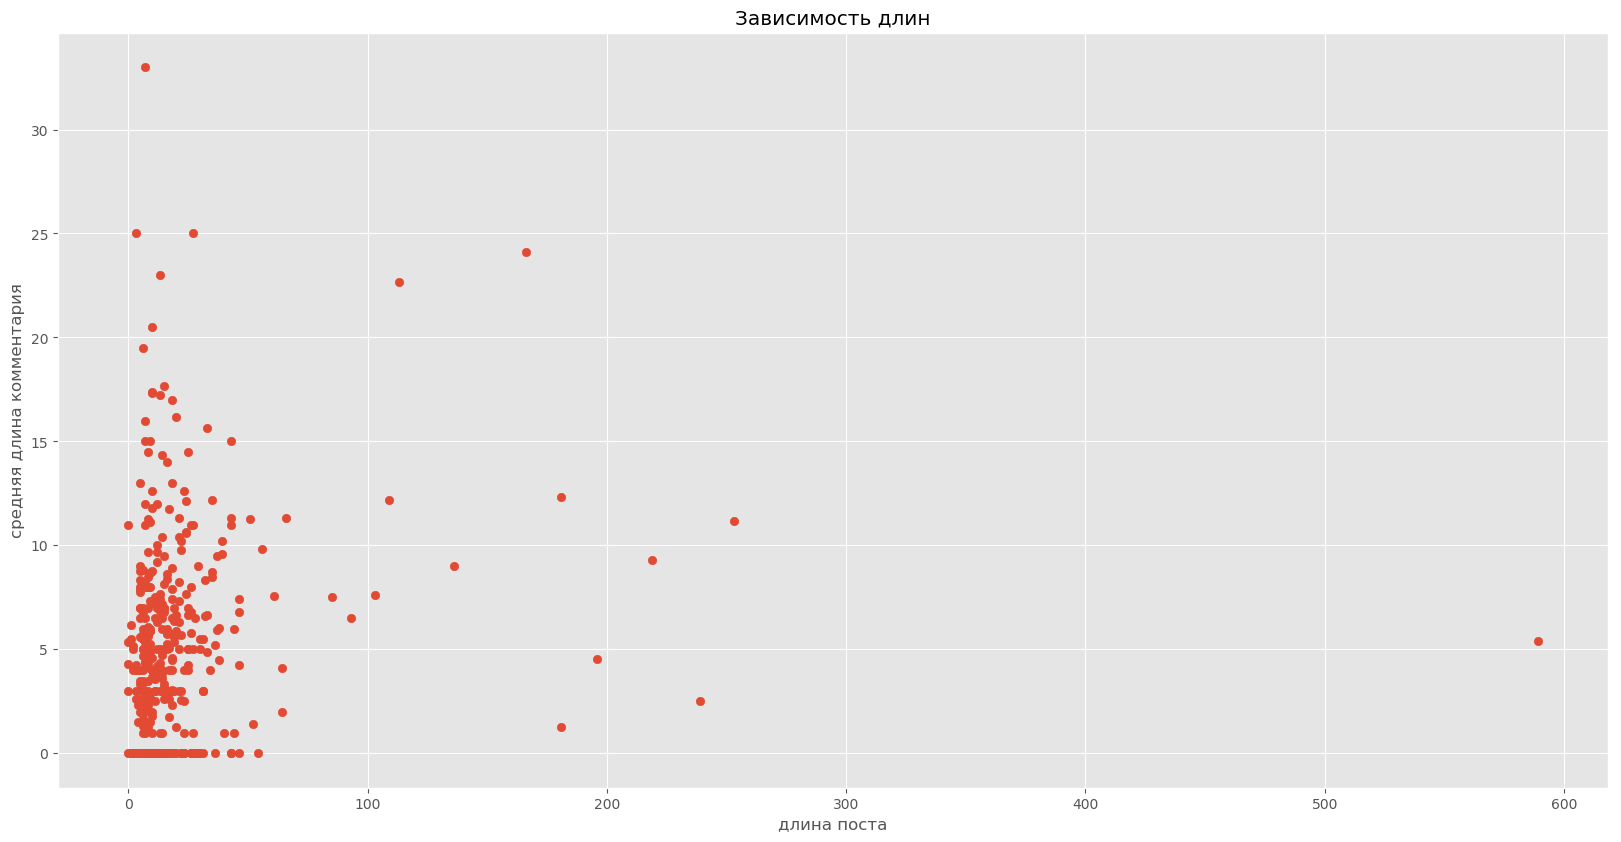

In [8]:
plt.figure(figsize=(20, 10), dpi=100)
plt.scatter(len_post, aver_len_com)
plt.title("Зависимость длин")
plt.xlabel("длина поста")
plt.ylabel("средняя длина комментария")
plt.savefig('lenXlen.png')
plt.show()

**Выбрасываю x>300, т.к. там только 1 точка**

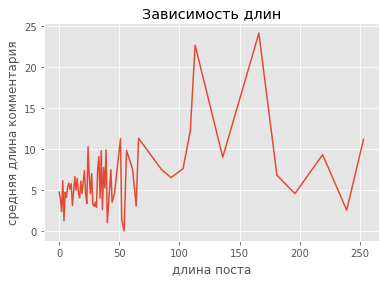

In [18]:
X = []
Y = []
for key, value in res_len.items():
    if key < 300:
        X.append(key)
        Y.append(value)

plt.plot(X,Y)

plt.title("Зависимость длин")
plt.xlabel("длина поста")
plt.ylabel("средняя длина комментария")

plt.show()

**Тут я пытаюсь сгладить график выше**

In [14]:
from scipy.interpolate import interp1d  # это чтобы нарисовать сглаженную кривую
import numpy as np

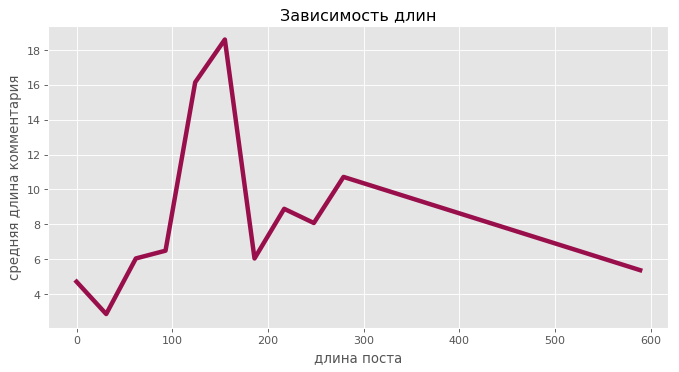

In [19]:
city_nums = [c[1] for c in sorted(res_len.items(),
                                  key=lambda x: x[0], reverse=False)]

x = sorted([r_l for r_l in res_len])

f = interp1d(x, [x for x in city_nums], kind='linear')
x_new = np.linspace(min(x), max(x), 20)
y_smooth = f(x_new)


plt.figure(figsize=(10, 5), dpi=80)
plt.plot(x_new, y_smooth, c='xkcd:berry', linewidth='4')
plt.title("Зависимость длин")
plt.xlabel("длина поста")
plt.ylabel("средняя длина комментария")
plt.show()

**Тут я использую приближение**

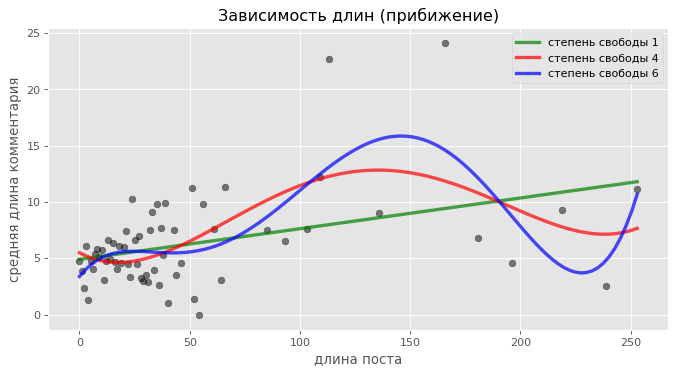

In [21]:
# %%flake8
plt.figure(figsize=(10, 5), dpi=80)

coefficients = polyfit(X, Y, 1)
p = np.poly1d(coefficients)
x = np.linspace(0, max(X), 100)
plt.plot(x, p(x), c='green',
         label='степень свободы 1', linewidth='3', alpha=0.7)

coefficients = polyfit(X, Y, 4)
p = np.poly1d(coefficients)
x = np.linspace(0, max(X), 100)
plt.plot(x, p(x), c='red',
         label='степень свободы 4', linewidth='3', alpha=0.7)

coefficients = polyfit(X, Y, 6)
p = np.poly1d(coefficients)
x = np.linspace(0, max(X), 100)
plt.plot(x, p(x), c='blue',
         label='степень свободы 6', linewidth='3', alpha=0.7)

plt.scatter(X, Y, c='black', alpha=0.5)

plt.title("Зависимость длин (прибижение)")
plt.xlabel("длина поста")
plt.ylabel("средняя длина комментария")
plt.legend()

plt.show()

**Тут выбрасываю x>60**

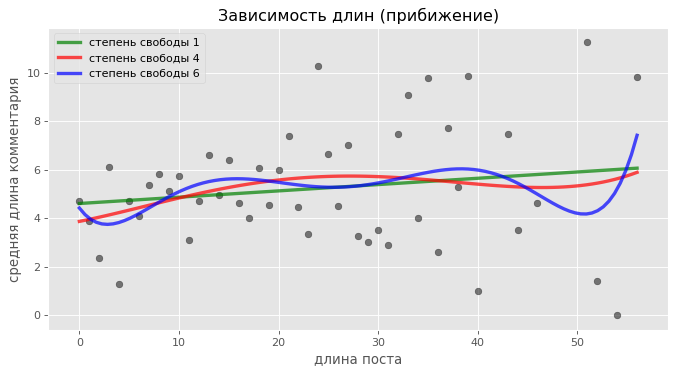

In [22]:
X = []
Y = []
for key, value in res_len.items():
    if key < 60:
        X.append(key)
        Y.append(value)

plt.figure(figsize=(10, 5), dpi=80)

coefficients = polyfit(X, Y, 1)
p = np.poly1d(coefficients)
x = np.linspace(0, max(X), 100)
plt.plot(x, p(x), c='green',
         label='степень свободы 1', linewidth='3', alpha=0.7)

coefficients = polyfit(X, Y, 4)
p = np.poly1d(coefficients)
x = np.linspace(0, max(X), 100)
plt.plot(x, p(x), c='red',
         label='степень свободы 4', linewidth='3', alpha=0.7)

coefficients = polyfit(X, Y, 6)
p = np.poly1d(coefficients)
x = np.linspace(0, max(X), 100)
plt.plot(x, p(x), c='blue',
         label='степень свободы 6', linewidth='3', alpha=0.7)

plt.scatter(X, Y, c='black', alpha=0.5)

plt.title("Зависимость длин (прибижение)")
plt.xlabel("длина поста")
plt.ylabel("средняя длина комментария")
plt.legend()

plt.show()

## Графики зависимости средней длины комментария от различных социо параметров (пол, работа)

### Длина коммента от пола автора

In [9]:
men = []
women = []
unknown = []

In [10]:
for r in data['result']:
    post = r['post']

    for com in post['comments']:
        length = len(com['text'].split())

        if com['author']['sex'] == 1:
            women.append(length)
        elif com['author']['sex'] == 2:
            men.append(length)
        else:
            unknown.append(length)

In [11]:
aver_men = sum(men)/len(men)
aver_women = sum(women)/len(women)
aver_unknown = sum(unknown)/len(unknown)

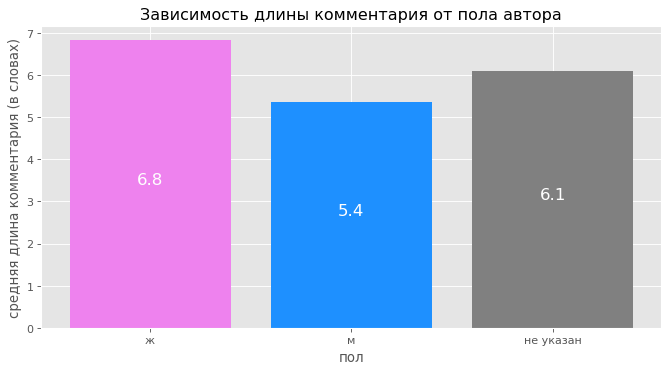

In [12]:
plt.figure(figsize=(10, 5), dpi=80)

plt.bar('ж', aver_women, color='#EE82EE')
plt.text('ж', aver_women/2, round(aver_women, 1),
         fontsize=15, horizontalalignment='center', color='white')

plt.bar('м', aver_men, color='#1E90FF')
plt.text('м', aver_men/2, round(aver_men, 1),
         fontsize=15, horizontalalignment='center', color='white')

plt.bar('не указан', aver_unknown, color='grey')
plt.text('не указан', aver_unknown/2, round(aver_unknown, 1),
         fontsize=15, horizontalalignment='center', color='white')

plt.title("Зависимость длины комментария от пола автора")
plt.xlabel("пол")
plt.ylabel("средняя длина комментария (в словах)")

plt.savefig('lencomXsex.png')

plt.show()

### Длина комментария от работы

In [13]:
work = []
school = []
university = []
unknown = []

In [14]:
for r in data['result']:
    post = r['post']

    for com in post['comments']:
        length = len(com['text'].split())

        if com['author']['occupation'] == 'work':
            work.append(length)
        elif com['author']['occupation'] == 'school':
            school.append(length)
        elif com['author']['occupation'] == 'university':
            university.append(length)
        else:
            unknown.append(length)

In [15]:
aver_total = []

aver_total.append(sum(school)/len(school))
aver_total.append(sum(university)/len(university))
aver_total.append(sum(work)/len(work))
aver_total.append(sum(unknown)/len(unknown))

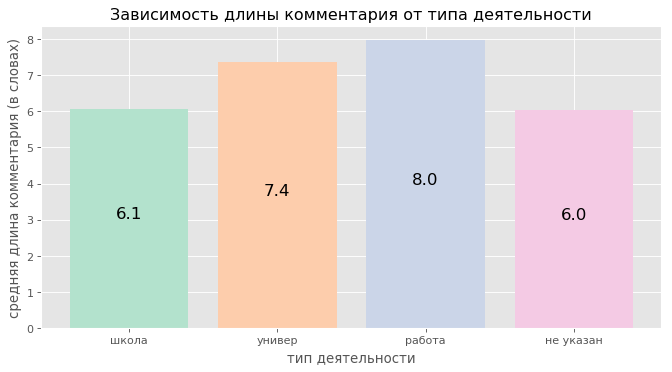

In [16]:
plt.figure(figsize=(10, 5), dpi=80)

X = ['школа', 'универ', 'работа', 'не указан']

colors = sns.color_palette('Pastel2', len(X))

plt.bar(X, aver_total, color=colors)
for i, x in enumerate(X):
    plt.text(x, aver_total[i]/2, round(aver_total[i], 1),
             fontsize=15, horizontalalignment='center', color='black')

plt.title("Зависимость длины комментария от типа деятельности")
plt.xlabel("тип деятельности")
plt.ylabel("средняя длина комментария (в словах)")

plt.savefig('lencomXoccup.png')

plt.show()

## Графики про длину поста

### График зависимости средней длины поста от времени публикации

In [17]:
time_len = {}

In [18]:
for r in data['result']:
    post = r['post']
    hour = post['date']['hours']
    length = len(post['text'].split())
    if hour not in time_len.keys():
        time_len[hour] = []
    time_len[hour].append(length)

In [19]:
time_len

{'08': [109,
  18,
  23,
  8,
  10,
  8,
  5,
  93,
  21,
  6,
  21,
  34,
  6,
  7,
  46,
  10,
  28,
  11,
  5,
  25,
  10,
  10],
 '15': [9,
  43,
  46,
  219,
  85,
  10,
  196,
  113,
  0,
  33,
  8,
  12,
  10,
  52,
  6,
  7,
  12,
  7,
  9,
  13,
  23,
  6,
  7,
  8,
  12],
 '12': [21, 14, 37, 136, 22, 44, 6, 17, 8, 1, 9, 9, 20, 31, 8, 10, 64, 25, 6],
 '11': [31,
  18,
  12,
  239,
  5,
  14,
  16,
  18,
  36,
  6,
  11,
  9,
  16,
  8,
  26,
  43,
  32,
  12,
  10,
  16,
  6,
  5,
  23,
  25,
  7,
  5,
  11],
 '07': [5,
  33,
  25,
  10,
  7,
  8,
  24,
  8,
  3,
  5,
  2,
  15,
  7,
  8,
  7,
  7,
  7,
  2,
  31,
  6,
  5,
  26,
  6,
  16,
  14,
  13,
  6,
  6,
  9],
 '20': [32, 20, 181, 9, 13, 2, 4, 7, 13, 8, 6, 3, 27, 22, 7, 19, 14, 3],
 '19': [8,
  10,
  16,
  5,
  39,
  18,
  22,
  39,
  16,
  8,
  6,
  5,
  7,
  16,
  8,
  3,
  6,
  3,
  13,
  8,
  16,
  8,
  5,
  8,
  18,
  13,
  7,
  18,
  5,
  5,
  43,
  18,
  40,
  11,
  6,
  6,
  4,
  7,
  15,
  13,
  7],
 '18': [16

In [20]:
for key, value in time_len.items():
    x = sum(time_len[key])/len(time_len[key])
    time_len[key] = round(x, 1)

In [21]:
time_len

{'08': 23.4,
 '15': 37.8,
 '12': 25.7,
 '11': 24.4,
 '07': 11.1,
 '20': 21.7,
 '19': 12.9,
 '18': 23.4,
 '17': 28.1,
 '16': 16.8,
 '14': 17.5,
 '13': 45.0,
 '10': 17.1,
 '06': 16.7,
 '21': 18.8,
 '09': 27.7,
 '05': 14.0,
 '22': 11.8,
 '04': 5.0,
 '02': 11.0,
 '23': 16.0}

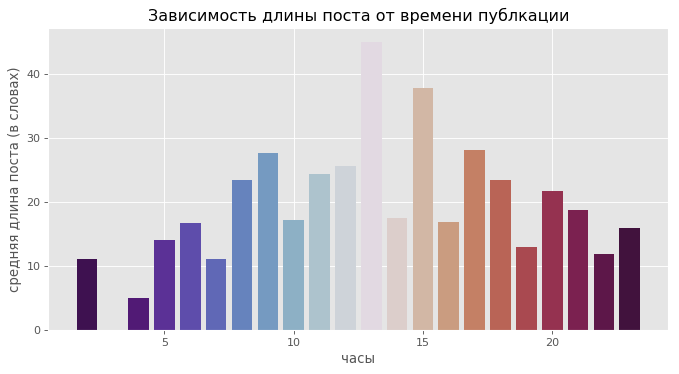

In [22]:
t_l = [t[1] for t in sorted(time_len.items(),
                            key=lambda x: x[0], reverse=False)]
labels = sorted([int(time) for time in time_len])

colors = sns.color_palette('twilight_shifted', len(t_l))

plt.figure(figsize=(10, 5), dpi=80)
plt.bar(labels, t_l, color=colors)

plt.title("Зависимость длины поста от времени публкации")
plt.xlabel("часы")
plt.ylabel("средняя длина поста (в словах)")

plt.savefig('lenpostXhour.png')

plt.show()

### Графики зависимости средней длины поста от дня публикации

In [37]:
date_len = {}

In [38]:
for r in data['result']:
    post = r['post']
    length = len(post['text'].split())
    day = post['date']['day']
    if day not in date_len.keys():
        date_len[day] = []
    date_len[day].append(length)

In [39]:
for key, value in date_len.items():
    x = sum(date_len[key])/len(date_len[key])
    date_len[key] = round(x, 1)

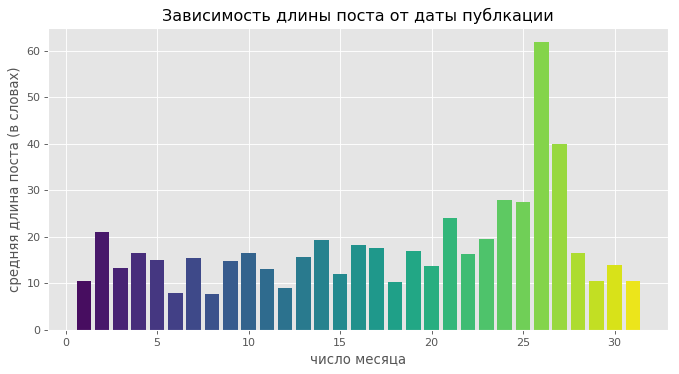

In [40]:
d_l = [d[1] for d in sorted(date_len.items(),
                            key=lambda x: x[0], reverse=False)]
labels = sorted([int(date) for date in date_len])

colors = sns.color_palette('viridis', len(d_l))

plt.figure(figsize=(10, 5), dpi=80)
plt.bar(labels, d_l, color=colors)

plt.title("Зависимость длины поста от даты публкации")
plt.xlabel("число месяца")
plt.ylabel("средняя длина поста (в словах)")

plt.show()

### График зависимости средней длины поста от дня недели

In [23]:
week = {}

from datetime import date

In [24]:
for r in data['result']:
    post = r['post']
    length = len(post['text'].split())

    year = int(post['date']['year'])
    month = int(post['date']['month'])
    day = int(post['date']['day'])

    week_d = date(year, month, day).weekday()
    if week_d not in week.keys():
        week[week_d] = []
    week[week_d].append(length)

In [25]:
for key, value in week.items():
    x = sum(week[key])/len(week[key])
    week[key] = round(x, 1)

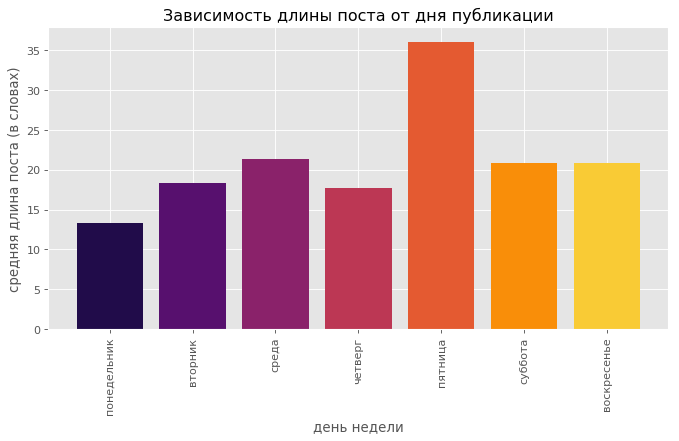

In [26]:
Y2 = [w[1] for w in sorted(week.items(),
                           key=lambda x: x[0], reverse=False)]
X2 = sorted([int(day) for day in week])
weekdays = ['понедельник', 'вторник', 'среда',
            'четверг', 'пятница', 'суббота', 'воскресенье']
colors = sns.color_palette('inferno', len(Y2))

plt.figure(figsize=(10, 5), dpi=80)
plt.bar(X2, Y2, color=colors)

plt.title("Зависимость длины поста от дня публикации")
plt.xlabel("день недели")
plt.ylabel("средняя длина поста (в словах)")
plt.xticks(X2, weekdays, rotation=90)

plt.savefig('lenpostXweekday.png')

plt.show()

# Частотность топ 20-30 слов

In [27]:
import re

In [28]:
stop_list = ['и', 'в', 'не', 'на', 'я', 'быть',
             'он', 'с', 'что', 'а', 'по', 'это',
             'она', 'этот', 'к', 'но', 'они', 'мы',
             'как', 'из', 'у', 'который', 'то', 'за',
             'свой', 'что', 'весь', 'год', 'от', 'так',
             'о', 'для', 'ты', 'же', 'все', 'тот',
             'мочь', 'вы', 'человек', 'такой', 'его',
             'сказать', 'только', 'или', 'ещё', 'бы',
             'себя', 'один', 'как', 'уже', 'до', 'время',
             'если', 'сам', 'когда', 'другой', 'вот',
             'говорить', 'наш', 'мой', 'знать', 'стать',
             'при', 'чтобы', 'дело', 'жизнь', 'кто',
             'первый', 'очень', 'два', 'день', 'её',
             'новый', 'рука', 'даже', 'во', 'со', 'раз',
             'где', 'там', 'под', 'можно', 'ну', 'какой',
             'после', 'их', 'работа', 'без', 'самый',
             'потом', 'надо', 'хотеть', 'ли', 'слово',
             'идти', 'большой', 'должен', 'место', 'иметь',
             'ничто']

### Считая хештеги за слова

In [29]:
all_words = []

for r in data['result']:
    for word in r['post']['text'].split():
        word = re.sub('[^a-zA-ZñÑА-Яа-яёЁ]+', '', word)
        word = word.lower()
        if word not in stop_list and len(word) > 0:
            all_words.append(word)

In [30]:
len(all_words)

6100

In [31]:
from collections import Counter

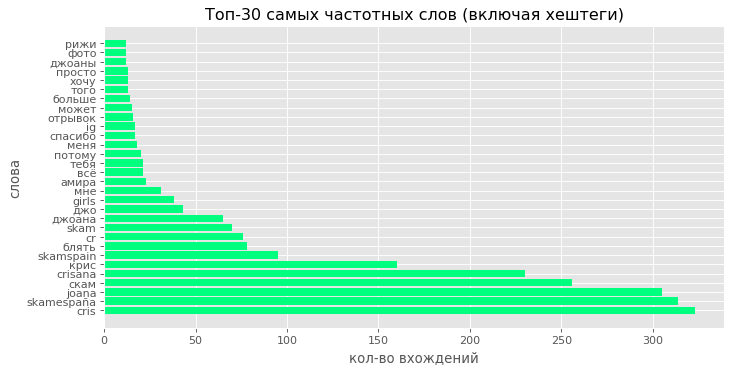

In [32]:
common_words = dict(Counter(all_words).most_common(30))

X3 = [w for w in common_words.keys()]
Y3 = [common_words[key] for key in common_words.keys()]

plt.figure(figsize=(10, 5), dpi=80)
plt.barh(X3, Y3, color='#00FF7F')


plt.title("Топ-30 самых частотных слов (включая хештеги)")
plt.xlabel("кол-во вхождений")
plt.ylabel("слова")

plt.savefig('top1.png')

plt.show()

### Не считая хештеги

In [33]:
all_words = []
for r in data['result']:
    for word in r['post']['text'].split():
        word = word.lower()
        if word.startswith('#') or word.startswith('['):
            continue
        word = re.sub('[^a-zA-ZñÑА-Яа-яёЁ#]+', '', word)
        if len(word) > 0 and word not in stop_list:
            all_words.append(word)

In [34]:
len(all_words)

4284

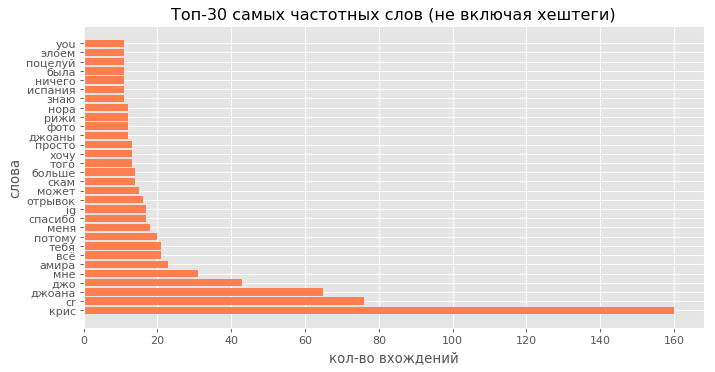

In [35]:
common_words = dict(Counter(all_words).most_common(30))

X3 = [w for w in common_words.keys()]
Y3 = [common_words[key] for key in common_words.keys()]

plt.figure(figsize=(10, 5), dpi=80)
plt.barh(X3, Y3, color='#FF7F50')


plt.title("Топ-30 самых частотных слов (не включая хештеги)")
plt.xlabel("кол-во вхождений")
plt.ylabel("слова")

plt.savefig('top2.png')

plt.show()

# Корпус в виде базы данных

# Лемматизация

## лемматизированный корпус